<a href="https://colab.research.google.com/github/aryan619348/Stock-Market-Price-Prediction/blob/main/stock_market_prediction_using_cnn_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction using CNN-LSTM model
This project is about analysis of Stock Market and providing predictions to the stockholders. For this, we used CNN-LSTM approach to create a blank model, then use it to train on stock market data. Further implementation is discussed below...

In [ ]:
import numpy as np 
import pandas as pd 
import os

# Data Preprocessing and Analysis

In [ ]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Then the datasets are loaded

In [ ]:
data = pd.read_csv('/content/MAX_NIFTY_DATA.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0.0
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195,0.0
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098,0.0
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805,0.0
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805,0.0


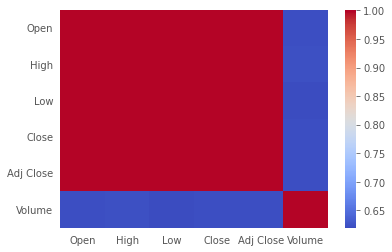

In [ ]:
import seaborn as sns
sns.heatmap(data.corr(),cmap='coolwarm')

LOW CORRELATION BETWEEN VOLUME AND OTHER PARAMETERS THUS DROPPING THE COLUMN

In [ ]:
data.drop('Volume',axis=1)

,Date,Open,High,Low,Close,Adj Close
0,2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902
1,2007-09-18,4494.100098,4551.799805,4481.549805,4546.200195,4546.200195
2,2007-09-19,4550.250000,4739.000000,4550.250000,4732.350098,4732.350098
3,2007-09-20,4734.850098,4760.850098,4721.149902,4747.549805,4747.549805
4,2007-09-21,4752.950195,4855.700195,4733.700195,4837.549805,4837.549805
...,...,...,...,...,...,...
3768,2022-12-20,18340.300781,18404.900391,18202.650391,18385.300781,18385.300781
3769,2022-12-21,18435.150391,18473.349609,18162.750000,18199.099609,18199.099609
3770,2022-12-22,18288.800781,18318.750000,18068.599609,18127.349609,18127.349609
3771,2022-12-23,17977.650391,18050.449219,17779.500000,17806.800781,17806.800781


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3773 entries, 0 to 3772
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3773 non-null   object 
 1   Open       3743 non-null   float64
 2   High       3743 non-null   float64
 3   Low        3743 non-null   float64
 4   Close      3743 non-null   float64
 5   Adj Close  3743 non-null   float64
 6   Volume     3743 non-null   float64
dtypes: float64(6), object(1)
memory usage: 206.5+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3743.000000,3743.000000,3743.000000,3743.000000,3743.000000,3.743000e+03
mean,8654.012905,8704.845635,8589.003467,8648.185494,8648.185494,1.942855e+05
std,3958.642167,3968.726100,3940.144193,3955.445503,3955.445503,2.165191e+05
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000e+00
25%,5437.699951,5480.349853,5393.900147,5433.675049,5433.675049,0.000000e+00
50%,7967.399902,8019.049805,7925.149902,7960.549805,7960.549805,1.590000e+05
75%,10867.274902,10917.750000,10797.575195,10856.100097,10856.100097,2.703000e+05
max,18871.949219,18887.599609,18778.199219,18812.500000,18812.500000,1.811000e+06


In [ ]:
data.isnull().sum()

Date          0
Open         30
High         30
Low          30
Close        30
Adj Close    30
Volume       30
dtype: int64

Filling null columns with mean values....

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

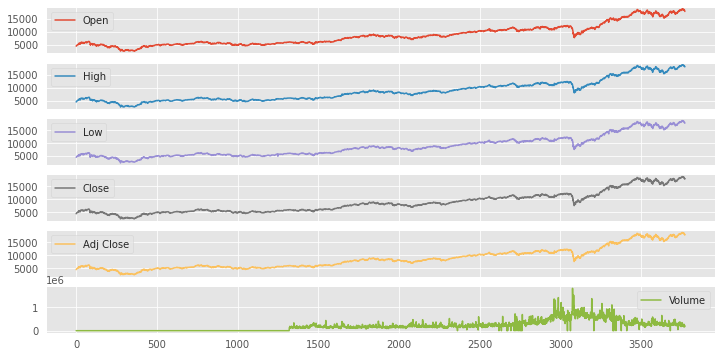

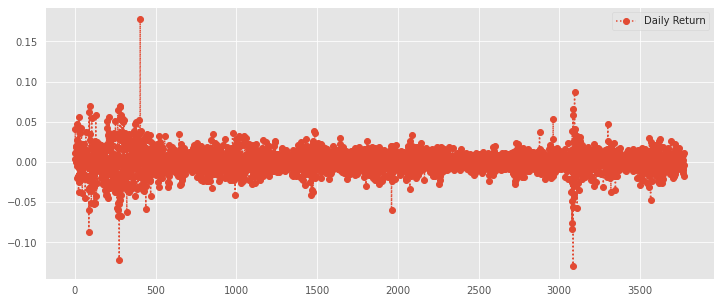

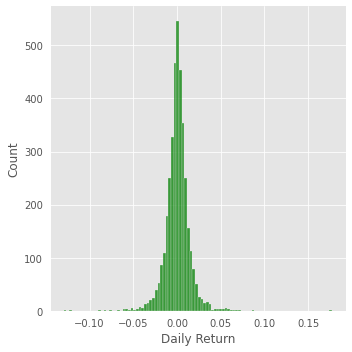

<ipython-input-9-ca5e5876d4de>:29: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


            Date          Open          High           Low         Close  \
0     2007-09-17   4518.450195   4549.049805   4482.850098   4494.649902   
1     2007-09-18   4494.100098   4551.799805   4481.549805   4546.200195   
2     2007-09-19   4550.250000   4739.000000   4550.250000   4732.350098   
3     2007-09-20   4734.850098   4760.850098   4721.149902   4747.549805   
4     2007-09-21   4752.950195   4855.700195   4733.700195   4837.549805   
...          ...           ...           ...           ...           ...   
3738  2022-12-20  18340.300781  18404.900391  18202.650391  18385.300781   
3739  2022-12-21  18435.150391  18473.349609  18162.750000  18199.099609   
3740  2022-12-22  18288.800781  18318.750000  18068.599609  18127.349609   
3741  2022-12-23  17977.650391  18050.449219  17779.500000  17806.800781   
3742  2022-12-26  17830.400391  18084.099609  17774.250000  18014.599609   

         Adj Close    Volume  MA for 10 days  MA for 50 days  MA for 100 days  \
0     

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

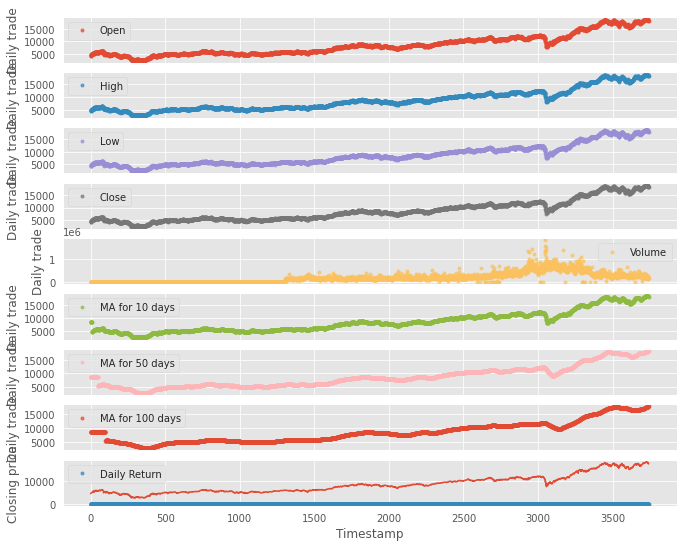

In [ ]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

After that, we'll visualize the data for understanding, this is shown below...

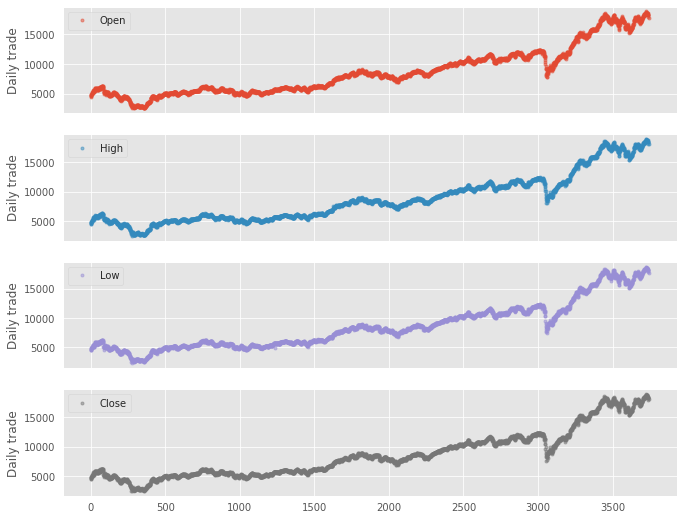

In [ ]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Then we'd print the data after making changes and dropping null data

            Date          Open          High           Low         Close  \
0     2007-09-17   4518.450195   4549.049805   4482.850098   4494.649902   
1     2007-09-18   4494.100098   4551.799805   4481.549805   4546.200195   
2     2007-09-19   4550.250000   4739.000000   4550.250000   4732.350098   
3     2007-09-20   4734.850098   4760.850098   4721.149902   4747.549805   
4     2007-09-21   4752.950195   4855.700195   4733.700195   4837.549805   
...          ...           ...           ...           ...           ...   
3738  2022-12-20  18340.300781  18404.900391  18202.650391  18385.300781   
3739  2022-12-21  18435.150391  18473.349609  18162.750000  18199.099609   
3740  2022-12-22  18288.800781  18318.750000  18068.599609  18127.349609   
3741  2022-12-23  17977.650391  18050.449219  17779.500000  17806.800781   
3742  2022-12-26  17830.400391  18084.099609  17774.250000  18014.599609   

         Adj Close    Volume  MA for 10 days  MA for 50 days  MA for 100 days  \
0     

,count,mean,std,min,25%,50%,75%,max
Open,3743.0,8654.012905,3958.642167,2553.600098,5437.699951,7967.399902,10867.274902,1.887195e+04
High,3743.0,8704.845635,3968.726100,2585.300049,5480.349853,8019.049805,10917.750000,1.888760e+04
Low,3743.0,8589.003467,3940.144193,2252.750000,5393.900147,7925.149902,10797.575195,1.877820e+04
Close,3743.0,8648.185494,3955.445503,2524.199951,5433.675049,7960.549805,10856.100097,1.881250e+04
Adj Close,3743.0,8648.185494,3955.445503,2524.199951,5433.675049,7960.549805,10856.100097,1.881250e+04
Volume,3743.0,194285.519637,216519.137501,0.000000,0.000000,159000.000000,270300.000000,1.811000e+06
MA for 10 days,3743.0,8641.482537,3936.909036,2658.359961,5442.830029,8012.830029,10833.559961,1.864742e+04
MA for 50 days,3743.0,8606.357071,3853.052508,2784.175981,5510.315005,8058.662002,10793.715479,1.820037e+04
MA for 100 days,3743.0,8563.193225,3759.037451,2830.934487,5518.874753,8161.914502,10775.855503,1.784758e+04
Daily Return,3743.0,0.000467,0.013882,-0.129805,-0.005668,0.000625,0.007003,1.774407e-01


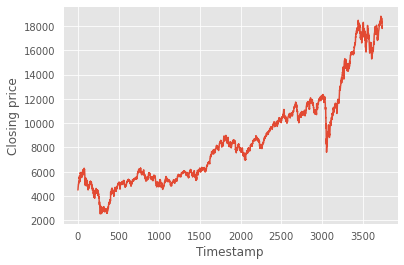

In [ ]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

The data has been analysed but it must be converted into data of shape [100,1] to make it easier for CNN to train on... Else it won't select necessary features and the model will fail

In [ ]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i+j,2]-first)/first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

2912
729


# Training part

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [ ]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

NameError: ignored

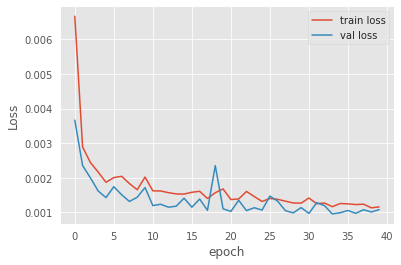

In [ ]:
  plt.plot(history.history['loss'], label='train loss')
  plt.plot(history.history['val_loss'], label='val loss')
  plt.xlabel("epoch")
  plt.ylabel("Loss")
  plt.legend()

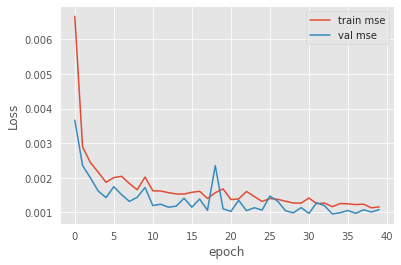

In [ ]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

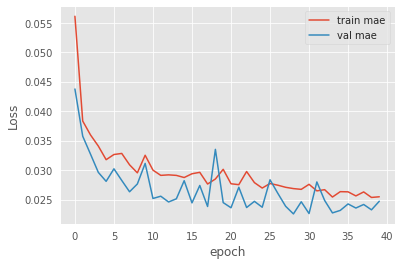

In [ ]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 1, 98, 64)        256       
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 49, 64)        0         
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 1, 47, 128)       24704     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 1, 23, 128)       0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 1, 21, 64)        2

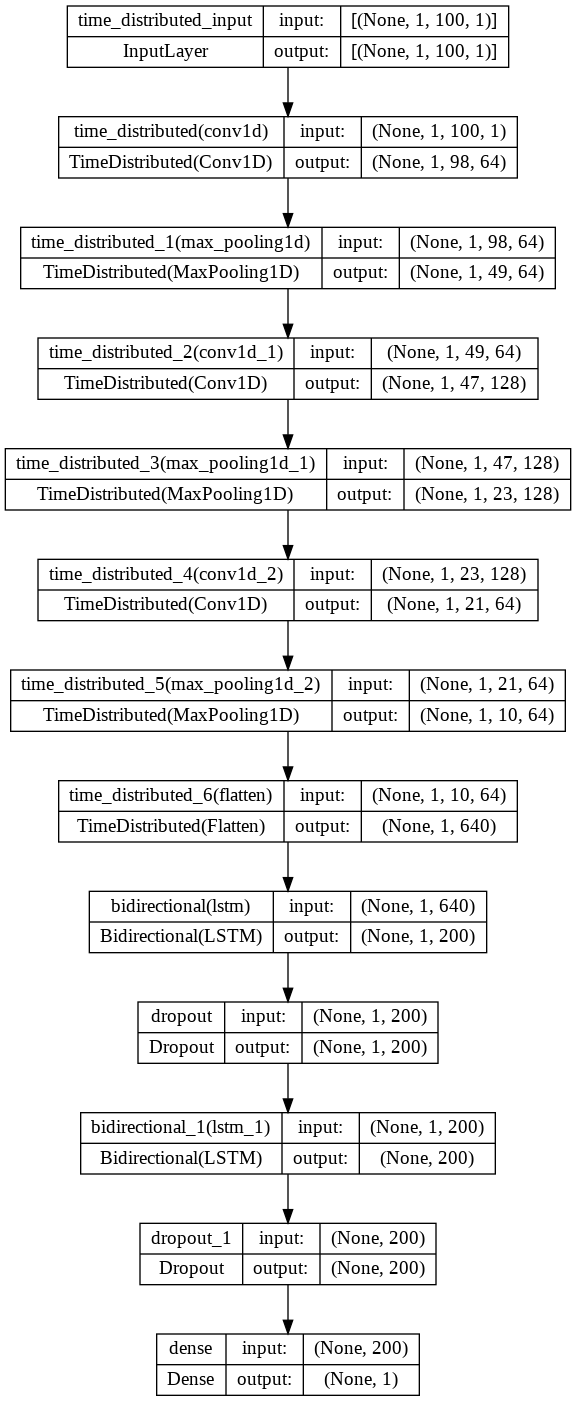

In [ ]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.evaluate(test_X, test_Y)

23/23 [==============================] - 0s 13ms/step - loss: 0.0011 - mse: 0.0011 - mae: 0.0247


[0.001078650588169694, 0.001078650588169694, 0.024711627513170242]

In [ ]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.960363
R2 Score: 0.960363
Max Error: 0.167853


23/23 [==============================] - 0s 11ms/step


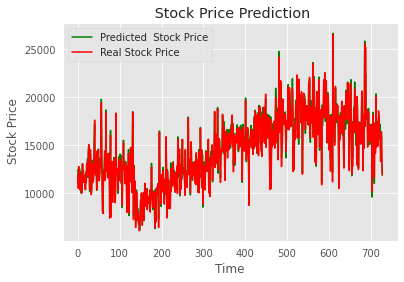

In [ ]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()